<a href="https://colab.research.google.com/github/erdemustun/Dosyalar/blob/main/Volatilite_Garch_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://medium.com/@sheikh.sahil12299/mastering-volatility-forecasting-with-garch-models-a-deep-dive-into-financial-market-dynamics-8df73c037b7e

In [ ]:
!pip install yfinance pandas numpy arch matplotlib

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [15]:
# Fetch data for TCS from Yahoo Finance
ticker = 'TCS.NS'
start_date = '2015-01-01'
end_date = '2024-01-01'

# Download the data
tcs_data = yf.download(ticker, start=start_date, end=end_date)




# Check the first few rows of the data
tcs_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2015-01-01,1050.999023,1059.855215,1049.120413,1059.855215,366830
2015-01-02,1064.995483,1069.743569,1053.084043,1053.249154,925740
2015-01-05,1048.810547,1073.438614,1042.369627,1065.635281,1754242
2015-01-06,1010.145203,1044.207565,1007.420173,1044.207565,2423784
2015-01-07,998.212646,1023.583917,993.980657,1019.806133,2636332


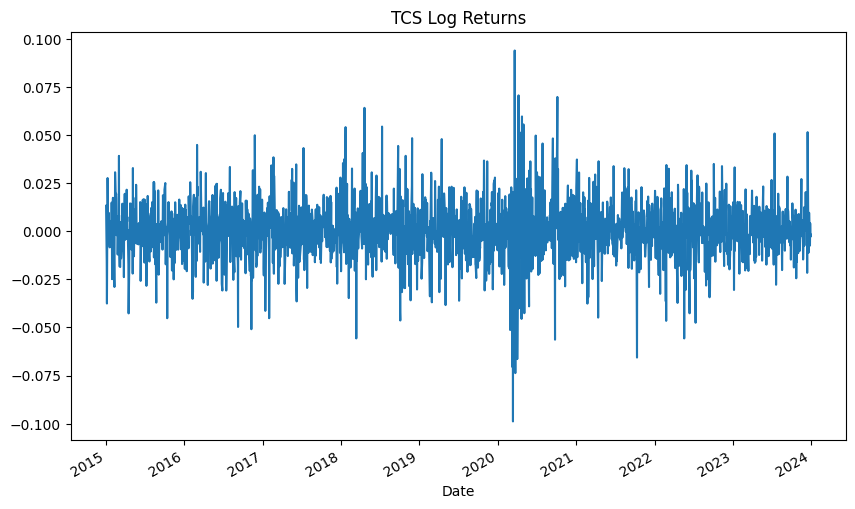

In [16]:
# Calculate daily log returns
tcs_data['Log_Returns'] = np.log(tcs_data['Close'] / tcs_data['Close'].shift(1))

# Drop missing values (first row will be NaN due to shift)
tcs_data = tcs_data.dropna()

# Plot log returns to visualize the data
tcs_data['Log_Returns'].plot(title='TCS Log Returns', figsize=(10, 6))
plt.show()

In [17]:
# Define the EGARCH model (1,1)
model = arch_model(tcs_data['Log_Returns'], vol='EGARCH', p=1, q=1)

# Fit the model
egarch_fit = model.fit(disp='off')

# Print the model summary
print(egarch_fit.summary())

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                6273.74
Distribution:                  Normal   AIC:                          -12539.5
Method:            Maximum Likelihood   BIC:                          -12516.7
                                        No. Observations:                 2220
Date:                Fri, Mar 14 2025   Df Residuals:                     2219
Time:                        12:50:02   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.6231e-04  2.694e-04      1.716  8.618e-02 

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002242. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [18]:
# Forecast volatility for the next 30 days
forecast_horizon = 30
volatility_forecast = egarch_fit.forecast(horizon=forecast_horizon,method='bootstrap')

# Extract the forecasted volatility (standard deviation) from the model
forecasted_volatility = np.sqrt(volatility_forecast.variance.values[-1, :])

# Display the forecasted volatility
print("Forecasted Volatility for the next 30 days:")
print(forecasted_volatility)

Forecasted Volatility for the next 30 days:
[0.01288557 0.01300133 0.0131705  0.01324607 0.01338604 0.01349645
 0.01355309 0.01364244 0.01364899 0.01369191 0.01374525 0.01381536
 0.01390882 0.01396866 0.01398559 0.01404092 0.01412476 0.01413941
 0.01417063 0.01422418 0.01426048 0.01430233 0.01437306 0.01437755
 0.01441334 0.01439045 0.01442124 0.01443041 0.01445297 0.0144183 ]


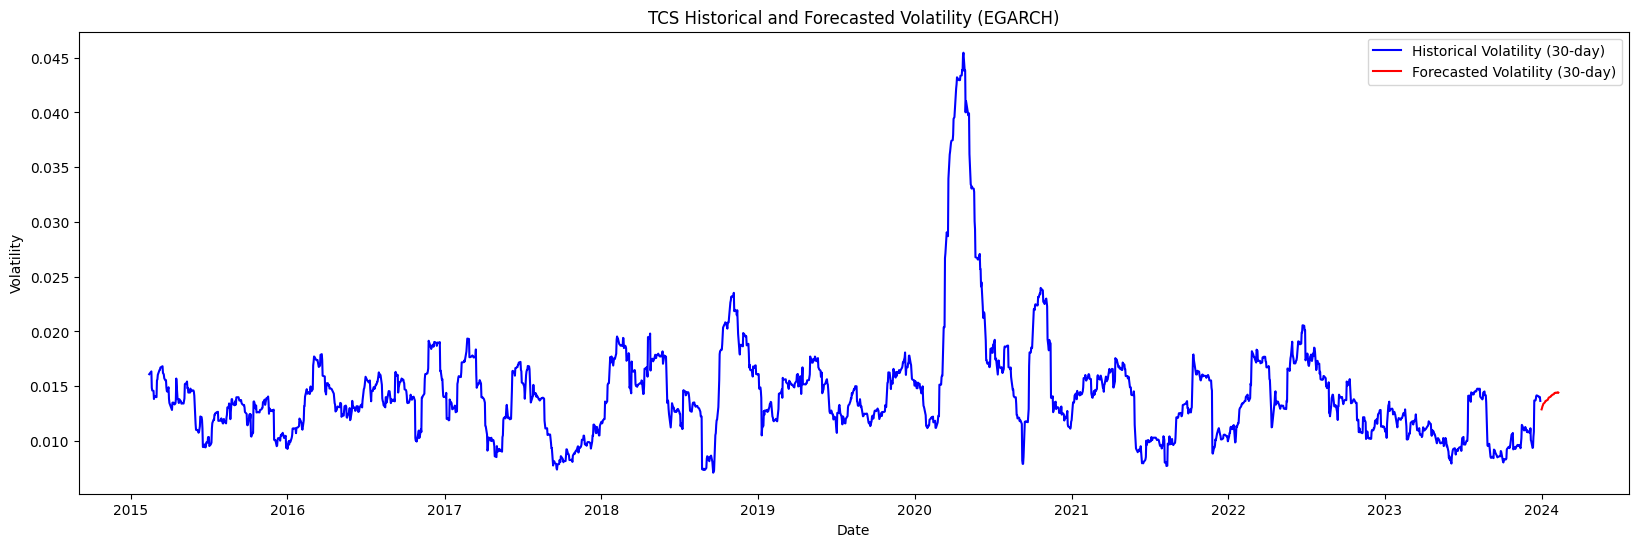

In [19]:
# Plot the historical and forecasted volatility
plt.figure(figsize=(20, 6))

# Historical volatility (rolling 30-day standard deviation of log returns)
historical_volatility = tcs_data['Log_Returns'].rolling(window=30).std()

# Plot historical volatility
plt.plot(historical_volatility, label='Historical Volatility (30-day)', color='blue')

# Plot forecasted volatility (append to the end of historical data)
future_dates = pd.date_range(tcs_data.index[-1], periods=forecast_horizon+1, freq='B')[1:]
forecast_volatility_series = pd.Series(forecasted_volatility, index=future_dates)

# Plot forecasted volatility
plt.plot(forecast_volatility_series, label='Forecasted Volatility (30-day)', color='red')

# Add labels and legend
plt.title('TCS Historical and Forecasted Volatility (EGARCH)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

https://theaiquant.medium.com/garch-models-for-volatility-forecasting-a-python-based-guide-d48deb5c7d7b

In [ ]:
başka örnek

In [20]:
# Import necessary libraries
import yfinance as yf

# Download data with yfinance
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2024-04-30'

data = yf.download(ticker, start=start_date, end=end_date)

# Print the first few rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455076  6.391278  6.422876  493729600
2010-01-05  6.451466  6.487879  6.417459  6.458086  601904800
2010-01-06  6.348847  6.477046  6.342227  6.451467  552160000
2010-01-07  6.337110  6.379844  6.291067  6.372320  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328684  447610800


In [22]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from arch import arch_model

# Download data with yfinance
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2024-04-30'

data = yf.download(ticker, start=start_date, end=end_date)

# Calculate log returns
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

# Data preprocessing
returns = data['log_return'].dropna()

# Fit GARCH Model
am = arch_model(returns, mean='Zero', vol='Garch', p=1, q=1)
res = am.fit(disp='off')

# Forecast volatility
forecasts = res.forecast(horizon=5)

# Print the forecasted volatility
print(forecasts.mean.iloc[-1, :])

[*********************100%***********************]  1 of 1 completed

h.1    0.0
h.2    0.0
h.3    0.0
h.4    0.0
h.5    0.0
Name: 2024-04-29 00:00:00, dtype: float64



/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003129. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [23]:
# Data preprocessing to remove NaN or infinite values
from arch import arch_model
import yfinance as yf
import numpy as np
import pandas as pd

data = data.dropna()
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Define function for model evaluation
def evaluate_model(data):
    # Fit GARCH model
    am = arch_model(data['log_return'], mean='Zero', vol='Garch', p=1, q=1, rescale=True)
    res = am.fit(disp='off')

    # Calculate AIC and BIC
    aic = res.aic
    bic = res.bic

    # Perform backtesting
    residuals = data['log_return'] - res.conditional_volatility
    res_t = residuals / res.conditional_volatility
    backtest = (res_t**2).sum()

    # Out-of-sample testing
    data_length = len(data)
    train_size = int(0.8 * data_length)
    train_data = data[:train_size]
    test_data = data[train_size:]

    res_oos = am.fit(last_obs=train_data.index[-1], disp='off')
    forecast = res_oos.forecast(start=train_data.index[-1], horizon=len(test_data))

    # Calculate out-of-sample forecast error
    forecast_vol = forecast.residual_variance.iloc[-1, :]
    error = (test_data['log_return'] - forecast_vol).dropna()

    return aic, bic, backtest, error

# Evaluate the GARCH model using log returns data
aic, bic, backtest, forecast_error = evaluate_model(data)

# Print the evaluation results
print(f'AIC: {aic}')
print(f'BIC: {bic}')
print(f'Backtesting Result: {backtest}')

AIC: 13824.929212811741
BIC: 13843.497779143985
Backtesting Result: 3599.0860049594294


https://medium.com/@Teckk/volatility-modelling-and-coding-garch-1-1-in-python-a89c75f3e010

In [33]:
import numpy as np
import scipy
import pandas as pd
class garchOneOne(object):

    def __init__(self, logReturns):
        self.logReturns = logReturns * 100
        self.coefficients = self.garch_optimization()  # Call garch_optimization first to get coefficients
        self.sigma_2 = self.garch_filter(self.coefficients) # Pass coefficients to garch_filter

    def garch_filter(self, parameters):
        "Returns the variance expression of a GARCH(1,1) process."

        # Slicing the parameters list
        omega = parameters[0]
        alpha = parameters[1]
        beta = parameters[2]

        # Length of logReturns
        length = len(self.logReturns)

        # Initializing an empty array
        sigma_2 = np.zeros(length)

        # Filling the array, if i == 0 then uses the long term variance.
        for i in range(length):
            if i == 0:
                sigma_2[i] = omega / (1 - alpha - beta)
            else:
                sigma_2[i] = omega + alpha * self.logReturns[i-1]**2 + beta * sigma_2[i-1]

        return sigma_2

    def garch_loglikehihood(self, parameters):
        "Defines the log likelihood sum to be optimized given the parameters."
        length = len(self.logReturns)

        sigma_2 = self.garch_filter(parameters)

        loglikelihood = - np.sum(-np.log(sigma_2) - self.logReturns**2 / sigma_2)
        return loglikelihood

    def garch_optimization(self): # Indent garch_optimization within the class
        "Optimizes the log likelihood function and returns estimated coefficients"
        # Parameters initialization
        parameters = [.1, .05, .92]

        # Parameters optimization, scipy does not have a maximize function, so we minimize the opposite of the equation described earlier
        opt = scipy.optimize.minimize(self.garch_loglikehihood, parameters,
                                      bounds = ((.001,1),(.001,1),(.001,1)))

        variance = .01**2 * opt.x[0] / (1 - opt.x[1] - opt.x[2])   # Times .01**2 because it concerns squared returns

        return np.append(opt.x, variance)

In [31]:
# Downloading data
SPX = yf.download('^GSPC', start = '2005-01-01', interval = '1d')
CAC = yf.download('^FCHI', start = '2005-01-01', interval = '1d')
VIX = yf.download('^VIX', start = SPX.index[1], interval = '1d')
# Calculating log returns
SPX['log_returns'] = np.log(SPX['Close']) - np.log(SPX['Close'].shift(1))
CAC['log_returns'] = np.log(CAC['Close']) - np.log(CAC['Close'].shift(1))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [34]:
from arch import arch_model
# Estimation using our previously coded classes
modelSPX = garchOneOne(SPX['log_returns'][1:])
modelCAC = garchOneOne(CAC['log_returns'][1:])
# Fitting using the arch_model package
arch_mSPX = arch_model(SPX['log_returns'][1:] * 100, mean = 'Zero', vol = 'GARCH')
arch_mSPX = arch_mSPX.fit()
arch_mCAC = arch_model(CAC['log_returns'][1:] * 100, mean = 'Zero', vol = 'GARCH')
arch_mCAC = arch_mCAC.fit()
# Extracting confidence intervals
conf_int_SPX = pd.DataFrame(arch_mSPX.conf_int(alpha = .2))
conf_int_CAC = pd.DataFrame(arch_mCAC.conf_int(alpha = .2))
# Creating the test
conf_int_SPX['garchOneOne'] = modelSPX.coefficients[:-1]
conf_int_CAC['garchOneOne'] = modelCAC.coefficients[:-1]
conf_int_SPX['Test'] = np.where(conf_int_SPX['garchOneOne'] < conf_int_SPX['upper'], np.where(conf_int_SPX['garchOneOne'] > conf_int_SPX['lower'], "Ok", "Not ok"), "Not ok")
conf_int_CAC['Test'] = np.where(conf_int_CAC['garchOneOne'] < conf_int_CAC['upper'], np.where(conf_int_CAC['garchOneOne'] > conf_int_CAC['lower'], "Ok", "Not ok"), "Not ok")

<ipython-input-33-110829572216>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma_2[i] = omega + alpha * self.logReturns[i-1]**2 + beta * sigma_2[i-1]


Iteration:      1,   Func. Count:      5,   Neg. LLF: 683783323.5436625
Iteration:      2,   Func. Count:     11,   Neg. LLF: 9463.224549508946
Iteration:      3,   Func. Count:     17,   Neg. LLF: 6886.909886355814
Iteration:      4,   Func. Count:     22,   Neg. LLF: 6795.949621459801
Iteration:      5,   Func. Count:     27,   Neg. LLF: 6931.223829154609
Iteration:      6,   Func. Count:     32,   Neg. LLF: 6780.818468074728
Iteration:      7,   Func. Count:     36,   Neg. LLF: 6780.813484724418
Iteration:      8,   Func. Count:     40,   Neg. LLF: 6780.8134526040585
Iteration:      9,   Func. Count:     43,   Neg. LLF: 6780.8134526020385
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6780.8134526040585
            Iterations: 9
            Function evaluations: 43
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      5,   Neg. LLF: 2876060127.475443
Iteration:      2,   Func. Count:     12,   Neg. LLF: 10609.7333611386

Text(0.5, 1.0, 'GARCH(1,1) processes and VIX')

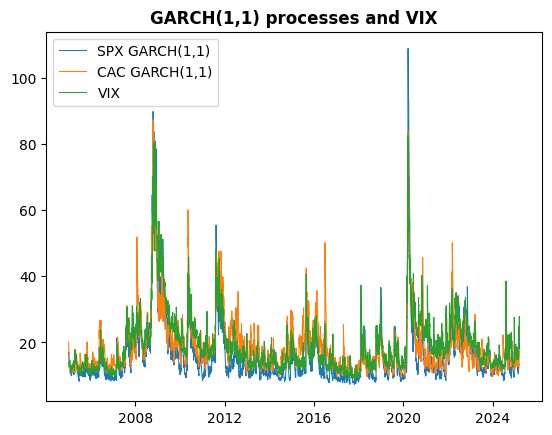

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
# Transforming data to pandas dataframe
    # + Annualizing volatilities
    # + Indexing by date
dfSPX = pd.DataFrame(np.sqrt(modelSPX.sigma_2*252), index = SPX.index[1:])
dfCAC = pd.DataFrame(np.sqrt(modelCAC.sigma_2*252), index = CAC.index[1:])
# Plotting the data
plt.plot(dfSPX, label = 'SPX GARCH(1,1)', linewidth = .75)
plt.plot(dfCAC, label = 'CAC GARCH(1,1)', linewidth = .75)
plt.plot(VIX.Close, label = 'VIX', linewidth = .75)
plt.legend()
plt.title('GARCH(1,1) processes and VIX', fontweight = 'bold')